# Laboratorio 2: Controlabilidad, observabilidad, estabilidad y detectabilidad

**Nombres:** Sebastián Acuña U. y Nicolás A. Herrera <br>
**Fecha:** 10 de septiembre de 2024 <br>
**Profesor:** Héctor Ramírez C. <br>
**Auxiliar:** Diego Olguín W. <br>
**Ayudantes:** Carlos Antil C. y Luis Fuentes C. <br>
**Curso:** [MA4703-1] Control Óptimo: Teoría y Laboratorio

In [3]:
# Librerías a utilizar

#using Pkg
#Pkg.add("DifferentialEquations")
#Pkg.add("JuMP")
#Pkg.add("NonlinearSolve")
#Pkg.add("OptimalControl")
#Pkg.add("LaTeXStrings")
#Pkg.add("NLPModelsIpopt")
#Pkg.add("ControlSystems")

using LinearAlgebra
using Plots
using LaTeXStrings
using DifferentialEquations
using NonlinearSolve
using OptimalControl
using ControlSystems

    Updating registry at `C:\Users\nicol\.julia\registries\General.toml`
   Resolving package versions...
   Installed ControlSystemsBase ─ v1.10.3
   Installed FFTW_jll ─────────── v3.3.10+0
   Installed AbstractFFTs ─────── v1.5.0
   Installed FFTW ─────────────── v1.8.0
   Installed LinearMaps ───────── v3.11.3
   Installed MatrixEquations ──── v2.4.2
   Installed Polynomials ──────── v4.0.11
   Installed DSP ──────────────── v0.7.9
   Installed IterTools ────────── v1.10.0
   Installed Hungarian ────────── v0.7.0
   Installed MatrixPencils ────── v1.8.0
   Installed ControlSystems ───── v1.10.4
    Updating `C:\Users\nicol\.julia\environments\v1.10\Project.toml`
  [a6e380b2] + ControlSystems v1.10.4
    Updating `C:\Users\nicol\.julia\environments\v1.10\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [a6e380b2] + ControlSystems v1.10.4
  [aaaaaaaa] + ControlSystemsBase v1.10.3
  [717857b8] + DSP v0.7.9
  [7a1cc6ca] + FFTW v1.8.0
  [e91730f6] + Hungarian v0.7.0
  [c8e1da08] + It

## Parte A: Modelamiento y Simulación

**Ejercicio 1:** Utilizando `DifferentialEquations` simule trayectorias del sistema lineal para distintos controles (constantes, sinusoidales, feedbacks, bang bang, etc.) con $\Omega_0 = 6.4 \cdot 10^{−3}$ y $R_0^3 = \frac{\mu}{\Omega_0^2}$.

In [37]:
# Constantes
m = 350 # masa del satélite
mu = 4.54 * 10^13 # constante gravitacional

T = 100.0 # tiempo final de simulación
tspan = (0.0, T) # intervalo de tiempo
TT = LinRange(0.0, T, 10000) # vector de tiempo

# Constantes orbitales
Omega = 6.4 * 10^(-5) # Omega_0
R = (mu/Omega^2)^(1/3) # R_0

# Matrices del sistema
A = [0 1 0 0; 3*Omega^2 0 0 2*Omega*R; 0 0 0 1; 0 -2*Omega/R 0 0]
B = [0 0; 1/m 0; 0 0; 0 1/(m*R)]

# Función auxiliar para control tipo bang-bang
function char(t)
    if t <= T/2
        return 1
    else
        return -1
    end
end

# Funciones para los sistemas a resolver
function constant1!(dx, x, u, t)
    dx .= A*x
end

function constant2!(dx, x, u, t)
    dx .= A*x .+ B*[1 ; 1]
end

function constant3!(dx, x, u, t)
    dx .= A*x .+ B*[1 ; -1]
end

function sinusoidal1!(dx, x, u, t)
    dx .= A*x .+ B*[sin(t) ; sin(t)]
end

function sinusoidal2!(dx, x, u, t)
    dx .= A*x .+ B*[sin(t) ; -sin(t)]
end

function bangbang1!(dx, x, u, t)
    dx .= A*x .+ B*[char(t) ; char(t)]
end

# Solución de los sistemas
prob1 = ODEProblem(constant1!, [0, 0, 0, 0], tspan)
prob2 = ODEProblem(constant2!, [0, 0, 0, 0], tspan)

sol1 = solve(prob1, Tsit5(), saveat = TT)
sol2 = solve(prob2, Tsit5(), saveat = TT)



retcode: Success
Interpolation: 1st order linear
t: 10000-element Vector{Float64}:
   0.0
   0.010001000100010001
   0.020002000200020003
   0.030003000300030006
   0.040004000400040006
   0.05000500050005
   0.06000600060006001
   0.07000700070007
   0.08000800080008001
   0.09000900090009001
   0.1000100010001
   0.11001100110011
   0.12001200120012002
   ⋮
  99.8899889988999
  99.8999899989999
  99.9099909990999
  99.91999199919992
  99.92999299929993
  99.93999399939995
  99.94999499949995
  99.95999599959995
  99.96999699969997
  99.97999799979999
  99.98999899989998
 100.0
u: 10000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [1.4288577954266573e-7, 2.8574304289398614e-5, 6.408504145869976e-15, 1.2815723856612859e-12]
 [5.715433620532826e-7, 5.7148645157529446e-5, 2.5634005645190886e-14, 2.563143130742708e-12]
 [1.2859731133557e-6, 8.572302260438088e-5, 5.767648809051304e-14, 3.844712235242172e-12]
 [2.286175399273647e-6, 0.00011429743662994113, 1.0253593507436523e-13,

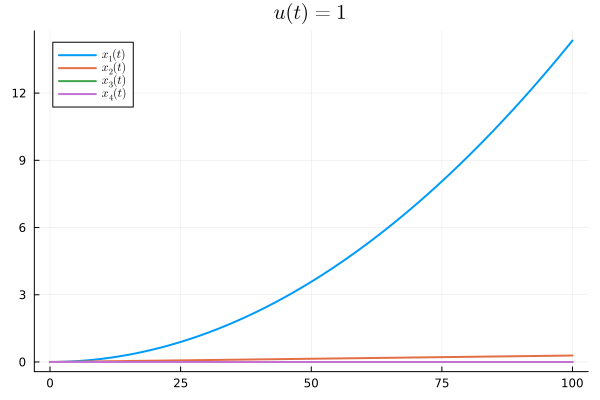

In [9]:
plot(TT, sol2[1, :], label=L"x_1(t)", linewidth=2)
plot!(TT, sol2[2, :], label=L"x_2(t)", linewidth=2)
plot!(TT, sol2[3, :], label=L"x_3(t)", linewidth=2)
plot!(TT, sol2[4, :], label=L"x_4(t)", linewidth=2)
title!(L"u(t) = 1")

## Parte B: Controlabilidad, observabilidad y estabilidad

**Ejercicio 2:** Utilizando `Julia` (sin el paquete de control), calcule la matriz de controlabilidad para el satélite. Compare el resultado con el obtenido usando el comando `ctrb` del paquete `ControlSystems` de `Julia`.

In [38]:
using LinearAlgebra

# Calcular las potencias de A multiplicadas por B
AB = A * B
A2B = A^2 * B
A3B = A^3 * B

# Matriz de controlabilidad
C_manual = [B AB A2B A3B]

println("Matriz de controlabilidad calculada manualmente:")
println(C_manual)


Matriz de controlabilidad calculada manualmente:
[0.0 0.0 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.170285714285715e-11 0.0; 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.170285714285715e-11 0.0 0.0 -1.4979657142857152e-15; 0.0 0.0 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752627e-18; 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752627e-18 6.718462616560845e-23 0.0]


In [14]:
using ControlSystems

# Calcular la matriz de controlabilidad
C_controlsystems = ctrb(A,B)

println("Matriz de controlabilidad usando ControlSystems:")
println(C_controlsystems)


Matriz de controlabilidad usando ControlSystems:
[0.0 0.0 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.1702857142857152e-11 0.0; 0.002857142857142857 0.0 0.0 3.657142857142857e-7 -1.1702857142857152e-11 0.0 0.0 -1.4979657142857148e-15; 0.0 0.0 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752623e-18; 0.0 1.2814450486299205e-10 -1.6402496622462988e-14 0.0 0.0 -2.0995195676752623e-18 6.718462616560846e-23 0.0]


In [15]:
isapprox(C_manual, C_controlsystems, atol=1e-8)


true

**Ejercicio 3:** Usualmente es difícil conocer completamente las variables de estado ya que sólo podemos obtener observaciones imprecisas de estas. Por esto, en lo que sigue, supondremos que solamente observamos $x_1$ y $x_3$. Esto nos lleva a considerar un observador de la forma:

$$
\vec{Y} = C\vec{X}.
$$

Identifique $C$ y utilice `Julia` (sin el paquete de control) para calcular la matriz de observabilidad del sistema $(3)-(4)$. Compare con lo obtenido usando el comando `obsv` del paquete `ControlSystems` de `Julia`.


Respuesta: Como sólo se observa $x_1$ y $x_2$ tenemos que la matriz $C$ es de la forma:
$$
C =
\left(\begin{array}{cc} 
1 & 0 & 0 & 0\\ 
0 & 0 & 1 & 0
\end{array}\right)
$$ 


In [39]:
# Definir la matriz C

C = [1 0 0 0;
     0 0 1 0]

# Calcular las potencias de A multiplicadas por C
CA = C * A
CA2 = C * A^2
CA3 = C * A^3

# Matriz de observabilidad
O_manual = [C; CA; CA2; CA3]

println("Matriz de observabilidad calculada manualmente:")
println(O_manual)


Matriz de observabilidad calculada manualmente:
[1.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0; 1.2288000000000004e-8 0.0 0.0 2853.920939530693; 0.0 -5.740873817862046e-12 0.0 0.0; 0.0 -4.096000000000002e-9 0.0 0.0; -7.054385747388884e-20 0.0 0.0 -1.6384000000000006e-8]


In [18]:
# Calcular la matriz de observabilidad
O_controlsystems = obsv(A,C)

println("Matriz de observabilidad usando ControlSystems:")
println(O_controlsystems)


Matriz de observabilidad usando ControlSystems:
[1.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0; 1.2288000000000004e-8 0.0 0.0 2853.920939530693; 0.0 -5.740873817862046e-12 0.0 0.0; 0.0 -4.096000000000002e-9 0.0 0.0; -7.054385747388884e-20 0.0 0.0 -1.6384000000000006e-8]


In [19]:
isapprox(O_manual, O_controlsystems, atol=1e-8)


true

**Ejercicio 4:** A partir de lo aprendido en clases, calcule la forma canónica de Brunovski de los sistemas del ejercicio anterior (sin utilizar el toolbox de Control).

Se calcula el polinomio característico de la matriz A, obteniendo $p_A (\lambda) = \lambda ^4 + \Omega_0 ^2 \lambda^2$, de donde identificamos los coeficientes $a_1 = 0$ , $a_2 = \Omega_0 ^2$ , $a_3 = 0$ y $a_4 = 0$, con ello $\tilde{A}$ viene dada por:
$$
\tilde{A} = 
\left(\begin{array}{cc} 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & -\Omega_0^2 & 0\\
\end{array}\right)
$$

## Parte C: Reguladores y estabilizadores 

**Ejercicio 5:** Construya un estabilizador por feedback lineal, $\vec{U} = −K\vec{X}$ para una matriz $K$ apropiada, para el sistema (3). Para esto, utilice los comandos `place` y `lqr` para obtener distintas matrices de ganancia $K$. Con `eigvals` de `LinearAlgebra` verifique los sistemas son estabilizables. Compare los resultados obtenidos al utilizar ambos comandos. Simule las trayectorias obtenidas por estos controles.

In [63]:
polos = [-1, -1.5, -2, -2.5]

# Calcular la matriz K usando place
K_place = place(A, B, polos)

println("Matriz de ganancias K utilizando place:")
println(K_place)

eigvals_place = eigvals(A - B * K_place);

Matriz de ganancias K utilizando place:
[762.8147969336834 1085.894167231875 185.81808946259304 998978.510601192; 4.1430479342132883e9 2.3674559621822457e9 2.7863302977552887e10 3.0414454686507072e10]


In [62]:
# Definir las matrices Q y R para lqr
Q = I(4)
R = I(2)

# Calcular la matriz K utilizando lqr
K_lqr = lqr(A,B,Q,R)

println("Matriz de ganancias K utilizando lqr:")
println(K_lqr)

eigvals_lqr = eigvals(A - B * K_lqr)


Matriz de ganancias K utilizando lqr:
[1.0000043008482606 26.47634796884896 -5.4982162429909e-6 998875.379210294; 1.1580285890617513e-5 0.04480013681105779 0.8040587086045732 1.0133032990598253e6]


4-element Vector{ComplexF64}:
    -0.03782335424121274 - 0.03776952119268133im
    -0.03782335424121274 + 0.03776952119268133im
 -0.00012905083778513626 + 0.0im
   -7.984117490056713e-7 + 0.0im

In [64]:
println("Comparación de valores propios:")
println("Place: ", eigvals_place)
println("LQR: ", eigvals_lqr)

# Verifica si todos los valores propios tienen partes reales negativas
if all(real(eigvals_place) .< 0)
    println("El sistema cerrado con place es estable.")
else
    println("El sistema cerrado con place no es estable.")
end

if all(real(eigvals_lqr) .< 0)
    println("El sistema cerrado con lqr es estable.")
else
    println("El sistema cerrado con lqr no es estable.")
end

Comparación de valores propios:
Place: [-2.499999999999862, -2.000000000000109, -1.500000000000083, -0.9999999999999445]
LQR: ComplexF64[-0.03782335424121274 - 0.03776952119268133im, -0.03782335424121274 + 0.03776952119268133im, -0.00012905083778513626 + 0.0im, -7.984117490056713e-7 + 0.0im]
El sistema cerrado con place es estable.
El sistema cerrado con lqr es estable.


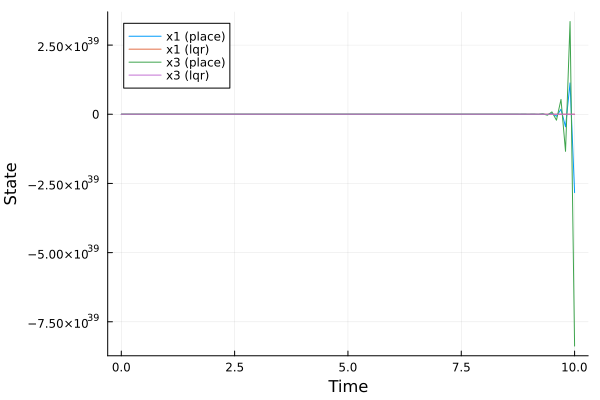

In [61]:
# Condiciones iniciales
X0 = [0.0, 0.0, 1.0, 0.0]  # Inicialmente lejos del equilibrio

# dinámica del sistema cerrado con place
function closed_loop_place!(du, u, p, t)
    du .= (A - B * K_place) * u
end

# dinámica del sistema cerrado con lqr
function closed_loop_lqr!(du, u, p, t)
    du .= (A - B * K_lqr) * u
end

# trayectoria utilizando place
t = 0:0.1:10
X_place = zeros(length(t), 4)
u = copy(X0)
for i in 1:length(t)
    X_place[i, :] = u
    closed_loop_place!(u, u, nothing, t[i])
end

#trayectoria utilizando lqr
X_lqr = zeros(length(t), 4)
u = copy(X0)
for i in 1:length(t)
    X_lqr[i, :] = u
    closed_loop_lqr!(u, u, nothing, t[i])
end

plot(t, X_place[:, 1], label="x1 (place)", xlabel="Tiempo", ylabel="Estado")
plot!(t, X_lqr[:, 1], label="x1 (lqr)")
plot!(t, X_place[:, 3], label="x3 (place)")
plot!(t, X_lqr[:, 3], label="x3 (lqr)")


**Ejercicio 6:** Construya el estimador de Luenberger asociado al sistema controlado y observado del ejercicio 3. Simule el estimador para distintos observaciones $Y(\cdot)$ y controles $U(\cdot)$.

**Ejercicio 7:** Considere los sistemas lineales controlados y observados del ejercicio 3. A partir de lo aprendido en clases, construya un control estabilizador por feedback lineal a partir de la observación $\vec{Y}$. Simule lo obtenido y compare con las trayectorias del sistema original para distintas condiciones iniciales. Discuta los resultados numéricos obtenidos en base a la teoría vista en cátedra.

**Ejercicio 8:** Utilizando `DifferentialEquations` resuelva numéricamente el sistema no lineal $(1)-(2)$ con los distintos controles obtenidos de los ejercicios 6 y 7. Grafique las soluciones y los controles obtenidos y compare los gráficos con las soluciones del sistema lineal $(3)$.